# Support Vector Machines Project


## PROBLEM STATEMENT

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company hopes to use the collected data to create a machine learning model that can help detect low quality ("fraud") wine samples. They want to know if it is even possible to detect such a difference.


## GOAL

The goal of this project is to use the wine dataset to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.


## DATA

Data Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


### Exploratory Data analysis

In [2]:
# import data analysis libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in the dataset

df = pd.read_csv("../DATA/wine_fraud.csv")

In [4]:
# explore the data

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [15]:
df["type"].unique()

array(['red', 'white'], dtype=object)

In [16]:
df["quality"].unique()

array(['Legit', 'Fraud'], dtype=object)

In [14]:
# find the features that has the highest correlation with the target

df["label"] = df["quality"].map({"Legit":1, "Fraud":0})
np.abs(df.drop(["quality", "type"], axis =1).corr(numeric_only=True)["label"]).sort_values()

density                 0.016351
pH                      0.020107
fixed acidity           0.021794
sulphates               0.034046
chlorides               0.034499
total sulfur dioxide    0.035252
residual sugar          0.048756
alcohol                 0.051141
citric acid             0.061789
free sulfur dioxide     0.085204
volatile acidity        0.151228
label                   1.000000
Name: label, dtype: float64

In [25]:
df=df.drop("label", axis=1)

<Axes: xlabel='quality', ylabel='count'>

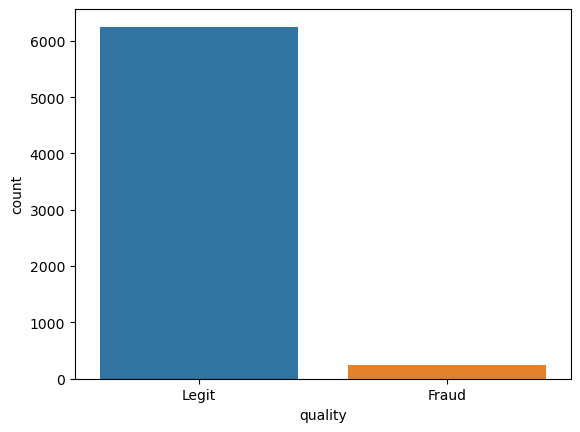

In [18]:
# find out if the dataset is balanced

sns.countplot(x='quality',data=df)

<Axes: xlabel='type', ylabel='count'>

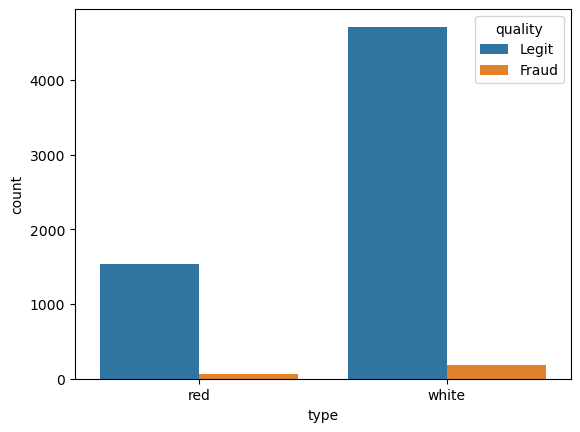

In [19]:
sns.countplot(x='type',data=df, hue="quality")

In [26]:
# create dummy variables for the "type" categorical feature this is the same as mapping that was done above since they are just 2 categories

df["type"]=pd.get_dummies(data = df["type"], drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


#### Machine Learning

Train | Test split, scaling 

In [27]:
# split the data in to Fatures and label

X = df.drop("quality", axis=1)
y = df["quality"]

In [29]:
#get the train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=404)

In [32]:
# scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [35]:
# create the SVC model instance while taking into account that the label is not balanced then fit the training data
# this is a base model with the defult parameters

from sklearn.svm import SVC

base_svc_model = SVC(class_weight="balanced")
base_svc_model.fit(scaled_X_train, y_train)

SVC(class_weight='balanced')

In [36]:
# get predictions

base_model_y_pred = base_svc_model.predict(scaled_X_test)

In [38]:
# evaluate the model

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, base_model_y_pred)

array([[ 12,  10],
       [ 95, 533]], dtype=int64)

In [40]:
print(classification_report(y_test, base_model_y_pred))

              precision    recall  f1-score   support

       Fraud       0.11      0.55      0.19        22
       Legit       0.98      0.85      0.91       628

    accuracy                           0.84       650
   macro avg       0.55      0.70      0.55       650
weighted avg       0.95      0.84      0.89       650



In [85]:
# use grid search to find optimal / better hyperparameters to improve the model

from sklearn.model_selection import GridSearchCV

svc_model = SVC(class_weight="balanced")
param_grid = {"C":[5,10,11,12,13,13.5],"gamma":["scale","auto"],"kernel":['linear',"rbf",'sigmoid']}
grid = GridSearchCV(svc_model,param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [5, 10, 11, 12, 13, 13.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [86]:
grid.best_params_

{'C': 13.5, 'gamma': 'auto', 'kernel': 'rbf'}

In [87]:
y_pred = grid.predict(scaled_X_test)

In [88]:
confusion_matrix(y_test,y_pred)

array([[ 13,   9],
       [ 54, 574]], dtype=int64)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.19      0.59      0.29        22
       Legit       0.98      0.91      0.95       628

    accuracy                           0.90       650
   macro avg       0.59      0.75      0.62       650
weighted avg       0.96      0.90      0.93       650



using cross validation, we find hyperparameters that yields produces a better accuracy.